<a href="https://colab.research.google.com/github/shelke16/DL/blob/main/Boston_Housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")


In [9]:
from google.colab import files
uploaded = files.upload()
boston = tf.keras.datasets.boston_housing


dir(boston)

Saving housing.csv to housing.csv
Saving RGRResults_test.csv to RGRResults_test.csv
Saving RGRResults_train.csv to RGRResults_train.csv


['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [10]:
boston_data = boston.load_data()

In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [12]:
scaler = StandardScaler()

In [13]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'), # Changed shape to (13,)
    tf.keras.layers.Dense(100, name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])


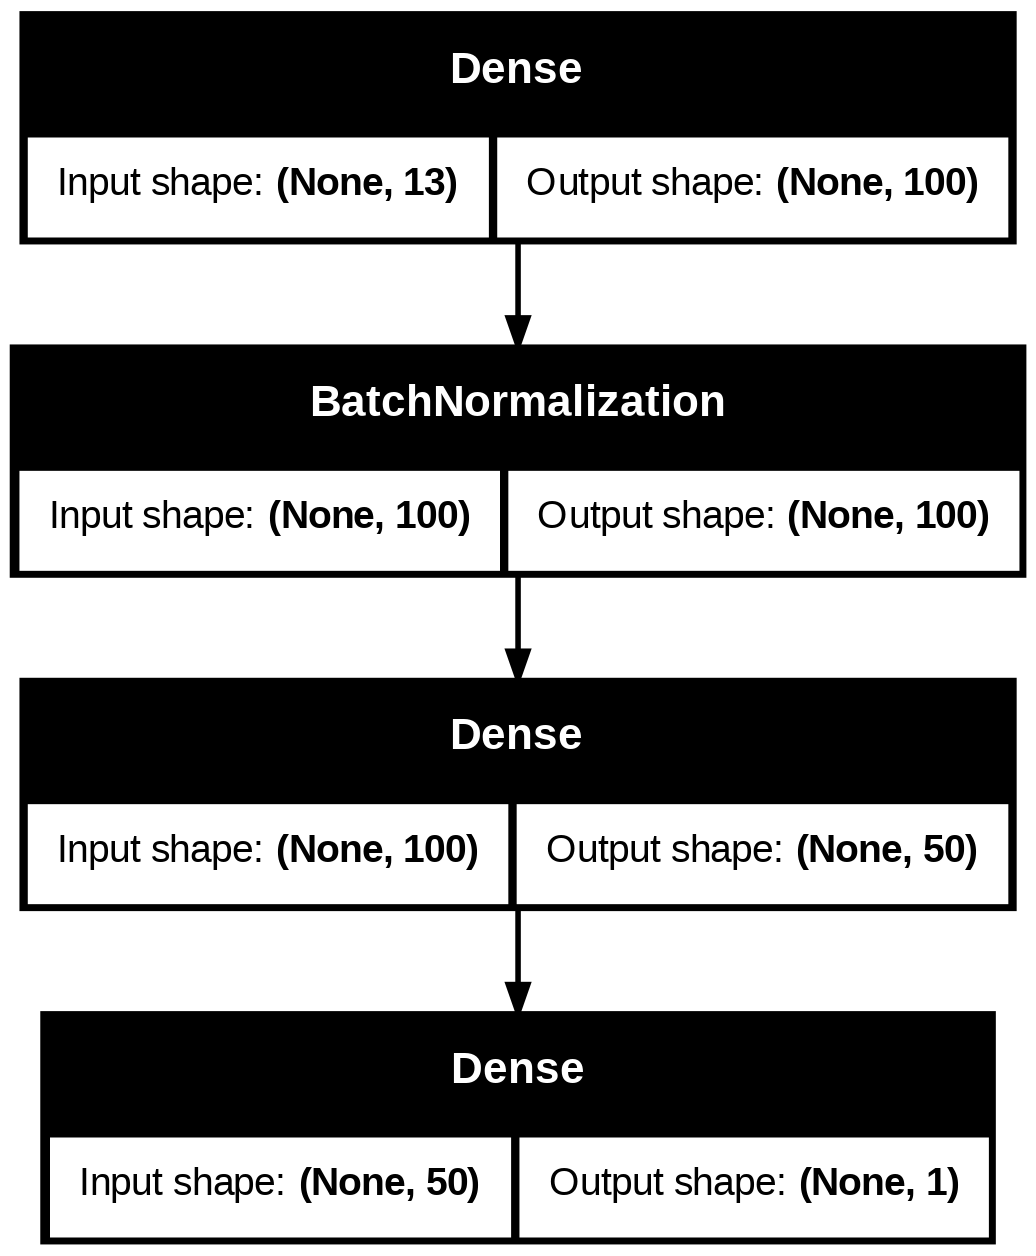

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-layer-2 (Dense)          │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-3                  │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-4 (Dense)          │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [18]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [19]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 587.0546 - mae: 22.3961 - val_loss: 1749.1610 - val_mae: 39.1015
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 542.5460 - mae: 21.9277 - val_loss: 676.7071 - val_mae: 24.1462
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 544.3715 - mae: 22.0421 - val_loss: 716.0603 - val_mae: 25.3212
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 526.1414 - mae: 21.5964 - val_loss: 635.1036 - val_mae: 24.0103
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 485.9994 - mae: 20.7580 - val_loss: 479.3228 - val_mae: 20.6379
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 393.4963 - mae: 18.8019 - val_loss: 320.3878 - val_mae: 16.7595
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 338.6583 - mae: 17.3535 - val_loss: 173.2590 - val_mae: 11.8521
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 240.1247 - mae: 14.4120 - val_loss: 94.8761 - val_mae: 7.9502
Epoch 9/20
13/13 ━━━

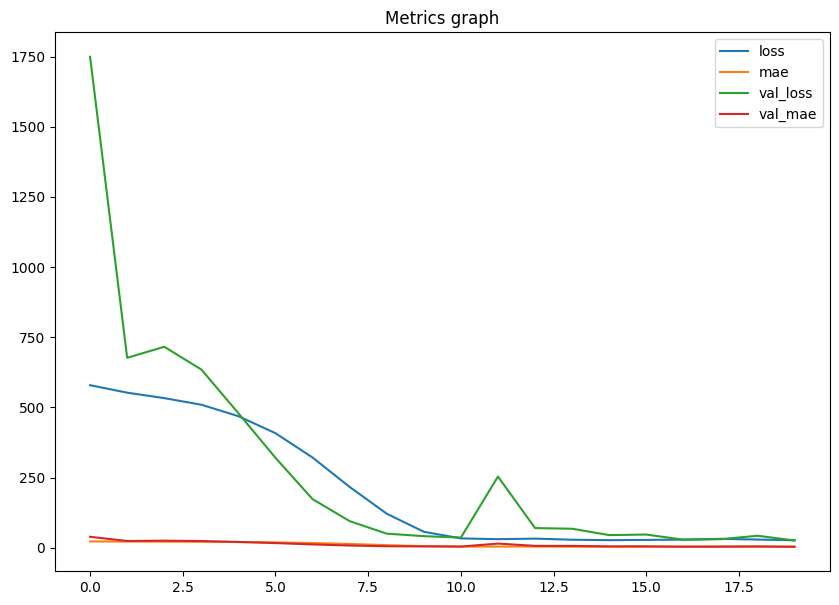

In [20]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [21]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


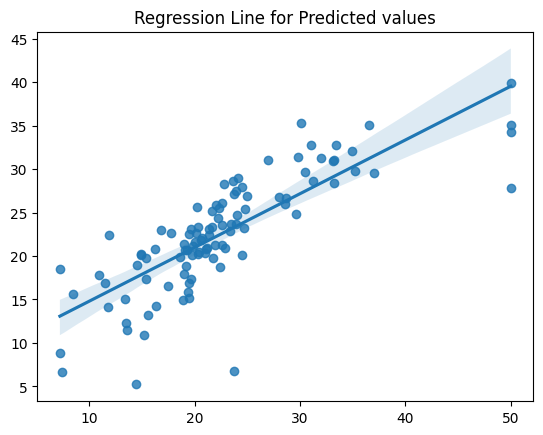

In [22]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [23]:
def regression_metrics_display(y_test, y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")

In [24]:
regression_metrics_display(y_test, y_pred)

MAE is 3.51119028820711
MSE is 25.791218628377663
R2 score is 0.637774017853123
